In [3]:
import os
import cv2
from PIL import Image
import easyocr
import matplotlib.pyplot as plt

Using CPU. Note: This module is much faster with a GPU.


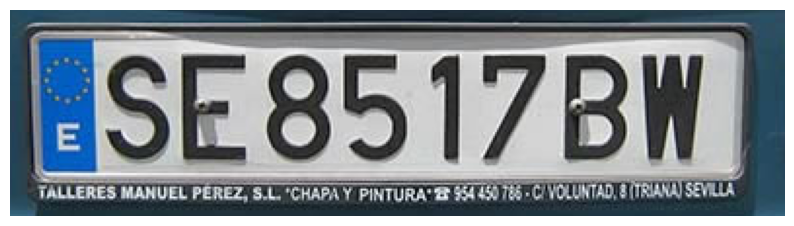

Matrícula (EasyOCR): SE8517BH, Probabilidad: 0.784536007570028
Procesando imagen...
Matrícula (EasyOCR): SE8SI7BH, Probabilidad: 0.36473776721956747
Matrícula (EasyOCR): SE85I7BH, Probabilidad: 0.7658847675452932


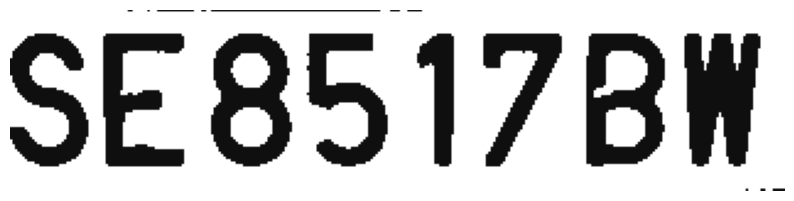

Resultado: SE8517BH, Probabilidad: 0.784536007570028


In [84]:

# Función para mostrar la imagen
def mostrar_imagen(imagen):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Inicializar el lector OCR de EasyOCR

def postprocesar_imagen(imagen):
    imagen_blur = cv2.GaussianBlur( imagen.copy(), (1, 1), 0)
    imagen_contrast = cv2.convertScaleAbs(imagen_blur, alpha=1.1, beta=15)
    return imagen_contrast


def detectar_texto(imagen_procesada):
    resultado = lector.readtext(imagen_procesada, detail=1)
    arriba_izq = (0,0)
    abajo_der = (0,0)
    count = 0
    for (bbox, texto, probabilidad) in resultado:
        # Extraer las coordenadas del bounding box
        (arriba_izq_actual, arriba_der, abajo_der_actual, abajo_izq) = bbox
        arriba_izq_actual = tuple([int(val) for val in arriba_izq_actual])
        abajo_der = tuple([int(val) for val in abajo_der])
        if (count == 0):
            arriba_izq=arriba_izq_actual
            abajo_der=abajo_der_actual
            count+=1
        else:
            abajo_der=abajo_der_actual

    if not resultado:
        return imagen_procesada, '', 0.01
    
    return imagen_procesada[arriba_izq[1]:abajo_der[1], arriba_izq[0]+2:abajo_der[0]], texto, probabilidad

def procesar_deteccion(imagen_procesada):

    probabilidad_anterior = 0
    imagen_actual, texto_actual, probabilidad_actual = detectar_texto(imagen_procesada)
    

    while probabilidad_actual > probabilidad_anterior:
        probabilidad_anterior = probabilidad_actual
        imagen_anterior = imagen_actual
        texto_anterior = texto_actual
        print(f"Matrícula (EasyOCR): {texto_anterior}, Probabilidad: {probabilidad_anterior}")
        imagen_actual, texto_actual, probabilidad_actual = detectar_texto(imagen_anterior)


    return imagen_anterior, texto_anterior, probabilidad_anterior

def preprocesar_imagen(imagen):
    imagen_blur = cv2.GaussianBlur( imagen.copy(), (5, 5), 0)
    imagen_gray = cv2.cvtColor(imagen_blur, cv2.COLOR_BGR2GRAY)
    imagen_contrast = cv2.convertScaleAbs(imagen_gray, alpha=1.1, beta=10)
    _, imagen_binaria = cv2.threshold(imagen_contrast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagen_binaria

def procesar_imagen(imagen_procesada):
    imagen_actual, texto_actual, probabilidad_actual = procesar_deteccion(imagen_procesada)
    probabilidad_anterior = 0
    imagen_anterior = ''
    texto_anterior = ''
    while probabilidad_actual > probabilidad_anterior:
        probabilidad_anterior = probabilidad_actual
        imagen_anterior = imagen_actual
        texto_anterior = texto_actual
        print("Procesando imagen...")
        post_procesado = postprocesar_imagen(imagen_actual)
        imagen_actual, texto_actual, probabilidad_actual = procesar_deteccion(post_procesado)
        mostrar_imagen(imagen_actual)
    
    return imagen_anterior, texto_anterior, probabilidad_anterior


def OCR(imagen):
    mostrar_imagen(imagen)
    imagen_preprocesada = preprocesar_imagen(imagen)
    return procesar_imagen(imagen_preprocesada)


lector = easyocr.Reader(['en'], gpu=False)
image_path = 'matriculas-europeas/spanish/SE8517BW.png'
imagen = cv2.imread(image_path)

imagen, texto, probabilidad = OCR(imagen)

if (probabilidad < 0.1):
    print("No se detectó ninguna texto")
else:
    print(f"Resultado: {texto}, Probabilidad: {probabilidad}")



